In [2]:
import numpy as np
import pandas as pd
import math
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn import ensemble  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 

In [3]:
iowa_file_path = './complete_timeseries.csv'

df = pd.read_csv(iowa_file_path,index_col = 0)

df["was_home"] = df["was_home"].astype(int)
df["1_was_home"] = df["1_was_home"].astype(int)
df["2_was_home"] = df["2_was_home"].astype(int)
df["3_was_home"] = df["3_was_home"].astype(int)
df["4_was_home"] = df["4_was_home"].astype(int)
df.columns.tolist()


['id',
 'team',
 'position',
 'total_points',
 'opponent_team',
 'transfers_in',
 'transfers_out',
 'was_home',
 'value',
 'gameweek',
 '1_total_points',
 '1_assists',
 '1_bonus',
 '1_bps',
 '1_clean_sheets',
 '1_creativity',
 '1_goals_conceded',
 '1_goals_scored',
 '1_ict_index',
 '1_influence',
 '1_minutes',
 '1_opponent_team',
 '1_own_goals',
 '1_penalties_missed',
 '1_penalties_saved',
 '1_red_cards',
 '1_round',
 '1_saves',
 '1_selected',
 '1_threat',
 '1_yellow_cards',
 '1_was_home',
 '1_transfers_in',
 '1_transfers_out',
 '1_value',
 '2_total_points',
 '2_assists',
 '2_bonus',
 '2_bps',
 '2_clean_sheets',
 '2_creativity',
 '2_goals_conceded',
 '2_goals_scored',
 '2_ict_index',
 '2_influence',
 '2_minutes',
 '2_opponent_team',
 '2_own_goals',
 '2_penalties_missed',
 '2_penalties_saved',
 '2_red_cards',
 '2_round',
 '2_saves',
 '2_selected',
 '2_threat',
 '2_yellow_cards',
 '2_was_home',
 '2_transfers_in',
 '2_transfers_out',
 '2_value',
 '3_total_points',
 '3_assists',
 '3_bonus'

In [ ]:
df.columns

Index(['id', 'team', 'position', 'total_points', 'opponent_team',
       'transfers_in', 'transfers_out', 'was_home', 'value', 'gameweek',
       ...
       '4_red_cards', '4_round', '4_saves', '4_selected', '4_threat',
       '4_yellow_cards', '4_was_home', '4_transfers_in', '4_transfers_out',
       '4_value'],
      dtype='object', length=110)

In [4]:
train = df

cols = ['id',
 'team',
 'position',
 'opponent_team',
 'transfers_in',
 'transfers_out',
 'was_home',
 'value',
 'gameweek',
 '1_total_points',
 '1_assists',
 '1_bonus',
 '1_bps',
 '1_clean_sheets',
 '1_creativity',
 '1_goals_conceded',
 '1_goals_scored',
 '1_ict_index',
 '1_influence',
 '1_minutes',
 '1_opponent_team',
 '1_own_goals',
 '1_penalties_missed',
 '1_penalties_saved',
 '1_red_cards',
 '1_round',
 '1_saves',
 '1_selected',
 '1_threat',
 '1_yellow_cards',
 '1_was_home',
 '1_transfers_in',
 '1_transfers_out',
 '1_value',
 '2_total_points',
 '2_assists',
 '2_bonus',
 '2_bps',
 '2_clean_sheets',
 '2_creativity',
 '2_goals_conceded',
 '2_goals_scored',
 '2_ict_index',
 '2_influence',
 '2_minutes',
 '2_opponent_team',
 '2_own_goals',
 '2_penalties_missed',
 '2_penalties_saved',
 '2_red_cards',
 '2_round',
 '2_saves',
 '2_selected',
 '2_threat',
 '2_yellow_cards',
 '2_was_home',
 '2_transfers_in',
 '2_transfers_out',
 '2_value',
 '3_total_points',
 '3_assists',
 '3_bonus',
 '3_bps',
 '3_clean_sheets',
 '3_creativity',
 '3_goals_conceded',
 '3_goals_scored',
 '3_ict_index',
 '3_influence',
 '3_minutes',
 '3_opponent_team',
 '3_own_goals',
 '3_penalties_missed',
 '3_penalties_saved',
 '3_red_cards',
 '3_round',
 '3_saves',
 '3_selected',
 '3_threat',
 '3_yellow_cards',
 '3_was_home',
 '3_transfers_in',
 '3_transfers_out',
 '3_value',
 '4_total_points',
 '4_assists',
 '4_bonus',
 '4_bps',
 '4_clean_sheets',
 '4_creativity',
 '4_goals_conceded',
 '4_goals_scored',
 '4_ict_index',
 '4_influence',
 '4_minutes',
 '4_opponent_team',
 '4_own_goals',
 '4_penalties_missed',
 '4_penalties_saved',
 '4_red_cards',
 '4_round',
 '4_saves',
 '4_selected',
 '4_threat',
 '4_yellow_cards',
 '4_was_home',
 '4_transfers_in',
 '4_transfers_out',
 '4_value']



X = train[cols]
y = train.total_points

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

regr = RandomForestRegressor(oob_score = True, n_estimators = 10000, max_features = 5)

regr.fit(X_train, y_train)
predict_train = regr.predict(X_train)

predict_test = regr.predict(X_test)


In [5]:

out_of_bag_predict = regr.oob_score

residuals = predict_train - y_train
residuals2 = predict_test - y_test
residuals3 = out_of_bag_predict - y_train
mse_train = np.sqrt(sum(residuals**2)/len(residuals))
mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
mse_out_of_bag = np.sqrt(sum(residuals3**2)/len(residuals3))
abs_train = sum(abs(residuals))/len(residuals)
abs_test = sum(abs(residuals2))/len(residuals2)
abs_out_of_bag = sum(abs(residuals3))/len(residuals3)
print('sqrt(MSE) on train set: ', mse_train)
print('sqrt(MSE) on test set: ', mse_test)
print('Mean Absolute value of residuals on train set: ', abs_train)
print('Mean Absolute value of residuals on test set: ', abs_test)

sqrt(MSE) on train set:  0.7648541026934673
sqrt(MSE) on test set:  2.007810213938941
Mean Absolute value of residuals on train set:  0.43150348805273203
Mean Absolute value of residuals on test set:  1.1250845679012345


In [6]:
current_gw = 20
prediction_test = train.loc[(train['gameweek'] == current_gw) ]
X = prediction_test[cols]
y = prediction_test.total_points
predict_test = regr.predict(X)
data = {'xp': [],'id':[],'position':[]}
prediction_df = pd.DataFrame(data)
prediction_df['xp']=pd.Series(predict_test)
id_array = prediction_test[prediction_test.columns[0]].to_numpy()
prediction_df['id']=pd.Series(id_array)
pos_array = prediction_test[prediction_test.columns[2]].to_numpy()
prediction_df['position']=pd.Series(pos_array)
prediction_df.head



<bound method NDFrame.head of          xp   id  position
0    0.1044    1         1
1    3.2468    2         0
2    3.2969    3         2
3    0.3001    4         2
4    0.1512    5         1
..      ...  ...       ...
573  0.0722  575         2
574  1.3452  576         1
575  6.1805  577         2
576  0.3789  579         2
577  0.8598  580         2

[578 rows x 3 columns]>

In [ ]:
prediction_df.to_csv('prediction_df.csv')

In [7]:
#from google.colab import files
#files.download("prediction_df.csv")
#files.upload()

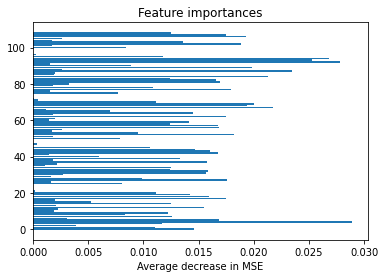

In [8]:
importances = regr.feature_importances_
plt.figure()
plt.title("Feature importances")
ax = plt.barh(range(len(X_train.columns)),importances,align="center");
plt.xlabel('Average decrease in MSE');

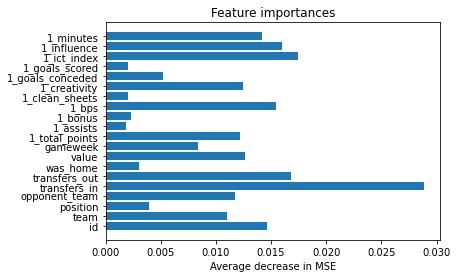

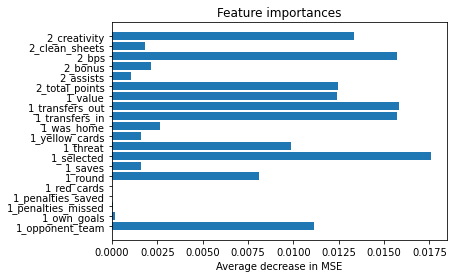

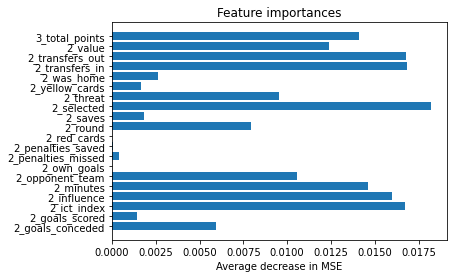

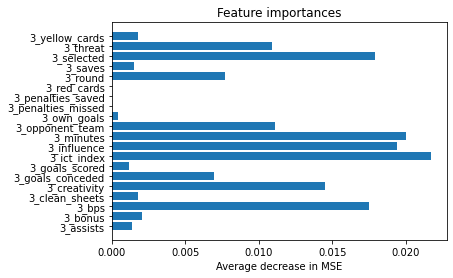

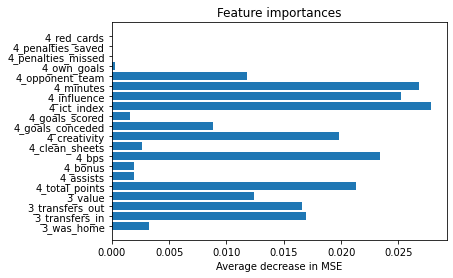

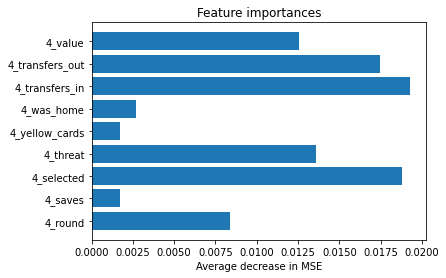

In [9]:


for i in range(0,120,20):
    plt.figure()
    plt.title("Feature importances")
    ax = plt.barh(list(X_train.columns)[i:i+20],importances[i:i+20],align="center");
    plt.xlabel('Average decrease in MSE');



In [10]:
features = [1,5,10,25,50,100]
n = len(features)
mse_train = [math.nan for i in range(n)]
mse_test = [math.nan for i in range(n)]
mse_out_of_bag = [math.nan for i in range(n)]
abs_train = [math.nan for i in range(n)]
abs_test = [math.nan for i in range(n)]
abs_out_of_bag = [math.nan for i in range(n)]

for i in range(n):
    Forest = RandomForestRegressor(oob_score = True, n_estimators = 1000, max_features = features[i])
    Forest.fit(X_train, y_train)
    predict_train = Forest.predict(X_train)
    predict_test = Forest.predict(X_test)
    
    residuals = predict_train - y_train
    residuals2 = predict_test - y_test
    residuals3 = out_of_bag_predict - y_train
    mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
    mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
    mse_out_of_bag[i] = np.sqrt(sum(residuals3**2)/len(residuals3))
    abs_train[i] = sum(abs(residuals))/len(residuals)
    abs_test[i] = sum(abs(residuals2))/len(residuals2)
    abs_out_of_bag[i] = sum(abs(residuals3))/len(residuals3)

Text(0.5, 1.0, 'number of features = [1,5,10,25,50,100]')

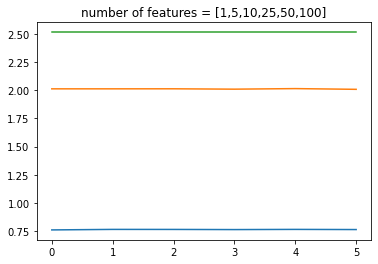

In [11]:


plt.figure()
plt.plot(np.arange(6), mse_train)
plt.plot(np.arange(6), mse_test)
plt.plot(np.arange(6), mse_out_of_bag)
plt.title('number of features = [1,5,10,25,50,100]')



In [12]:
depth = [1,3,5,8,10,12]
n = len(depth)
mse_train = [math.nan for i in range(n)]
mse_test = [math.nan for i in range(n)]
mse_out_of_bag = [math.nan for i in range(n)]
abs_train = [math.nan for i in range(n)]
abs_test = [math.nan for i in range(n)]
abs_out_of_bag = [math.nan for i in range(n)]

for i in range(n):
    Forest = RandomForestRegressor(oob_score = True, n_estimators = 1000, max_depth = depth[i])
    Forest.fit(X_train, y_train)
    
    predict_train = Forest.predict(X_train)
    predict_test = Forest.predict(X_test)
    
    
    residuals = predict_train - y_train
    residuals2 = predict_test - y_test
    residuals3 = out_of_bag_predict - y_train
    mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
    mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
    mse_out_of_bag[i] = np.sqrt(sum(residuals3**2)/len(residuals3))
    abs_train[i] = sum(abs(residuals))/len(residuals)
    abs_test[i] = sum(abs(residuals2))/len(residuals2)
    abs_out_of_bag[i] = sum(abs(residuals3))/len(residuals3)

Text(0.5, 1.0, 'sqrt(MSE) for oob, test and train')

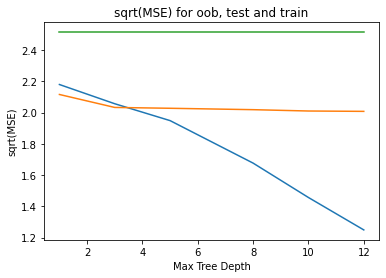

In [13]:


plt.figure()
plt.plot(depth, mse_train)
plt.plot(depth, mse_test)
plt.plot(depth, mse_out_of_bag)
plt.xlabel('Max Tree Depth')
plt.ylabel('sqrt(MSE)')
plt.title('sqrt(MSE) for oob, test and train')

